In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:

nifty = yf.Ticker("^NSEI")
nifty = nifty.history(period="max")
nifty.index = pd.to_datetime(nifty.index)
nifty.index = nifty.index.astype(str).str.replace('00:00:00+05:30', '')
nifty.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0,0.0,0.0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0,0.0,0.0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0,0.0,0.0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0,0.0,0.0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0,0.0,0.0


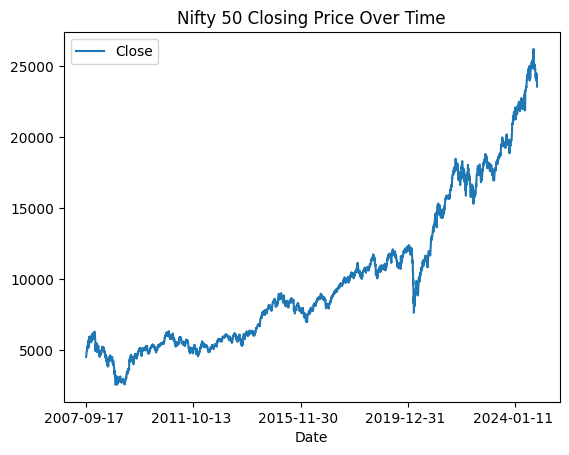

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195,1
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098,1
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805,1
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805,1
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195,1
...,...,...,...,...,...,...,...
2024-11-06,24308.750000,24537.599609,24204.050781,24484.050781,351100,24199.349609,0
2024-11-07,24489.599609,24503.349609,24179.050781,24199.349609,322200,24148.199219,0
2024-11-08,24207.699219,24276.150391,24066.650391,24148.199219,298700,24141.300781,0


In [ ]:
nifty.plot.line(y="Close", use_index=True)
plt.title("Nifty 50 Closing Price Over Time")
plt.show()

nifty = nifty.drop(columns=["Dividends", "Stock Splits"])

nifty["Tomorrow"] = nifty["Close"].shift(-1)
nifty["Target"] = (nifty["Tomorrow"] > nifty["Close"]).astype(int)
nifty = nifty.dropna()
nifty


In [ ]:
vix=yf.Ticker("^VIX")
vix=vix.history(period="max")
vix.index=pd.to_datetime(vix.index)
vix.rename(columns={'Open': 'Open_V', 'High': 'High_V','Low':'Low_V','Close':'Close_V'}, inplace=True)
vix= vix.drop(columns=["Dividends", "Stock Splits","Volume"])
vix=vix.loc["2007-09-17":]
vix.index = vix.index.astype(str).str.replace('00:00:00-06:00', '')
vix.index = vix.index.astype(str).str.replace('00:00:00-05:00', '')

vix

,Open_V,High_V,Low_V,Close_V
Date,,,,
2007-09-17,26.450001,27.080000,25.799999,26.480000
2007-09-18,25.790001,26.230000,20.270000,20.350000
2007-09-19,19.959999,20.570000,19.170000,20.030001
2007-09-20,20.469999,20.820000,19.549999,20.450001
2007-09-21,19.440001,19.809999,18.370001,19.000000
...,...,...,...,...
2024-11-07,15.860000,15.860000,15.130000,15.200000
2024-11-08,15.130000,15.330000,14.660000,14.940000
2024-11-11,15.330000,15.560000,14.890000,14.970000


In [ ]:
sp = yf.Ticker("^GSPC")
sp = sp.history(period="max")
sp.index = pd.to_datetime(sp.index)
sp= sp.drop(columns=["Dividends", "Stock Splits","Volume"])
sp=sp.loc["2007-09-17":]
sp.index = sp.index.astype(str).str.replace('00:00:00-04:00', '')
sp.index = sp.index.astype(str).str.replace('00:00:00-05:00', '')
sp.rename(columns={'Open': 'Open_S', 'High': 'High_S','Low':'Low_S','Close':'Close_S'}, inplace=True)
sp

,Open_S,High_S,Low_S,Close_S
Date,,,,
2007-09-17,1484.239990,1484.239990,1471.819946,1476.650024
2007-09-18,1476.630005,1519.890015,1476.630005,1519.780029
2007-09-19,1519.750000,1538.739990,1519.750000,1529.030029
2007-09-20,1528.689941,1529.140015,1516.420044,1518.750000
2007-09-21,1518.750000,1530.890015,1518.750000,1525.750000
...,...,...,...,...
2024-11-07,5947.209961,5983.839844,5947.209961,5973.100098
2024-11-08,5976.759766,6012.450195,5976.759766,5995.540039
2024-11-11,6008.859863,6017.310059,5986.689941,6001.350098


In [ ]:
nifty.index = pd.to_datetime(nifty.index)
vix.index=pd.to_datetime(vix.index)
nifty = pd.merge(nifty, vix,on='Date')
nifty.to_csv('nifty_vix.csv')
nifty

,Open,High,Low,Close,Volume,Tomorrow,Target,Open_V,High_V,Low_V,Close_V
Date,,,,,,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195,1,26.450001,27.080000,25.799999,26.480000
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098,1,25.790001,26.230000,20.270000,20.350000
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805,1,19.959999,20.570000,19.170000,20.030001
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805,1,20.469999,20.820000,19.549999,20.450001
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195,1,19.440001,19.809999,18.370001,19.000000
...,...,...,...,...,...,...,...,...,...,...,...
2024-11-06,24308.750000,24537.599609,24204.050781,24484.050781,351100,24199.349609,0,16.059999,16.820000,15.440000,16.270000
2024-11-07,24489.599609,24503.349609,24179.050781,24199.349609,322200,24148.199219,0,15.860000,15.860000,15.130000,15.200000
2024-11-08,24207.699219,24276.150391,24066.650391,24148.199219,298700,24141.300781,0,15.130000,15.330000,14.660000,14.940000


In [ ]:
horizons = [2, 5, 10, 20, 60, 250]
new_predictors = ["Close", "Volume", "Open", "High", "Low","Open_V","High_V","Low_V","Close_V"]

for horizon in horizons:
    rolling_avg = nifty["Close"].rolling(window=horizon).mean()
    nifty[f"Close_Ratio_{horizon}"] = nifty["Close"] / rolling_avg
    nifty[f"Momentum_{horizon}"] = nifty["Close"] - nifty["Close"].shift(horizon)
    nifty[f"Trend_{horizon}"] = nifty["Target"].shift(1).rolling(window=horizon).sum()
    nifty[f"Momentum_V{horizon}"] = nifty["Close_V"] - nifty["Close_V"].shift(horizon)
    nifty[f"Close_Ratio_V{horizon}"] = nifty["Close_V"] / rolling_avg
    new_predictors += [f"Close_Ratio_{horizon}", f"Momentum_{horizon}", f"Trend_{horizon}",f"Momentum_V{horizon}",f"Close_Ratio_V{horizon}"]

nifty = nifty.dropna()
nifty.head()
nifty = nifty.dropna()
nifty.to_csv("features.csv")
nifty.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,Open_V,High_V,Low_V,...,Close_Ratio_60,Momentum_60,Trend_60,Momentum_V60,Close_Ratio_V60,Close_Ratio_250,Momentum_250,Trend_250,Momentum_V250,Close_Ratio_V250
Date,,,,,,,,,,,,,,,,,,,,,
2008-09-29,3990.199951,3997.550049,3777.300049,3850.050049,0,3921.199951,1,36.919998,48.400002,36.919998,...,0.904596,-46.699951,28.0,23.070002,0.010977,0.770056,-644.599854,126.0,20.240002,0.009345
2008-09-30,3848.699951,3966.850098,3715.050049,3921.199951,0,3950.750000,1,43.770000,43.799999,38.860001,...,0.921934,-172.150146,28.0,13.469999,0.009261,0.784679,-625.000244,126.0,19.039999,0.007882
2008-10-01,3921.850098,4000.500000,3861.250000,3950.750000,0,3818.300049,0,39.389999,42.380001,39.389999,...,0.928791,25.000000,29.0,15.030001,0.009359,0.791088,-781.600098,126.0,19.780001,0.007971
2008-10-03,3953.550049,3969.550049,3804.850098,3818.300049,0,3602.350098,0,45.220001,45.520000,41.509998,...,0.898398,-211.699951,28.0,19.359999,0.010621,0.765136,-929.249756,125.0,24.689999,0.009045
2008-10-06,3817.300049,3820.850098,3581.600098,3602.350098,0,3606.600098,1,45.119999,58.240002,45.119999,...,0.848873,-386.199951,28.0,28.900000,0.012265,0.722578,-1235.199707,124.0,33.049999,0.010440


In [ ]:

# horizons = [2, 5, 10, 20, 60, 250]
# new_predictors = ["Close", "Volume", "Open", "High", "Low"]

# for horizon in horizons:
#     rolling_avg = nifty["Close"].rolling(window=horizon).mean()
#     nifty[f"Close_Ratio_{horizon}"] = nifty["Close"] / rolling_avg
#     nifty[f"Momentum_{horizon}"] = nifty["Close"] - nifty["Close"].shift(horizon)
#     nifty[f"Trend_{horizon}"] = nifty["Target"].shift(1).rolling(window=horizon).sum()
#     new_predictors += [f"Close_Ratio_{horizon}", f"Momentum_{horizon}", f"Trend_{horizon}"]

# nifty = nifty.dropna()
# nifty.head()


In [ ]:
param_grid = {  'n_estimators': [2000, 5000, 6000], 'min_samples_split': [50, 100, 150],  'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=5, scoring='precision')
grid_search.fit(nifty[new_predictors], nifty["Target"])

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 150, 'n_estimators': 6000}


In [ ]:

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:, 1]
    preds = (preds >= 0.55).astype(int)
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)


predictions = backtest(nifty, best_model, new_predictors)
print("Backtest Predictions Count:\n", predictions["Predictions"].value_counts())
print("Backtest Precision Score:", precision_score(predictions["Target"], predictions["Predictions"]))


Backtest Predictions Count:
 Predictions
0    876
1    469
Name: count, dtype: int64
Backtest Precision Score: 0.67590618336887


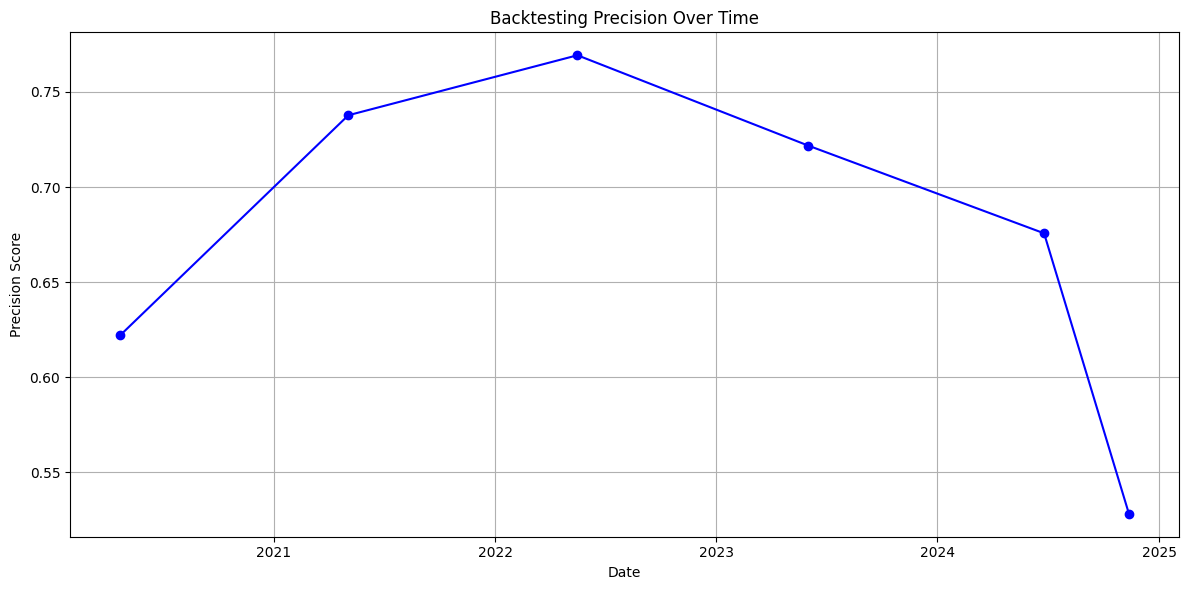

In [ ]:
precision_over_time = []
time_indices = []

step = 250
for i in range(0, predictions.shape[0], step):
    interval_data = predictions.iloc[i:i + step]
    precision = precision_score(interval_data["Target"], interval_data["Predictions"])
    precision_over_time.append(precision)
    time_indices.append(interval_data.index[-1])

plt.figure(figsize=(12, 6))
plt.plot(time_indices, precision_over_time, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Precision Score')
plt.title('Backtesting Precision Over Time')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(predictions["Target"], predictions["Predictions"])


true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

precision_for_positive_trend = true_positives / (true_positives + false_positives)
print("Precision for Positive Trend Predictions (1):", precision_for_positive_trend)


Precision for Positive Trend Predictions (1): 0.67590618336887


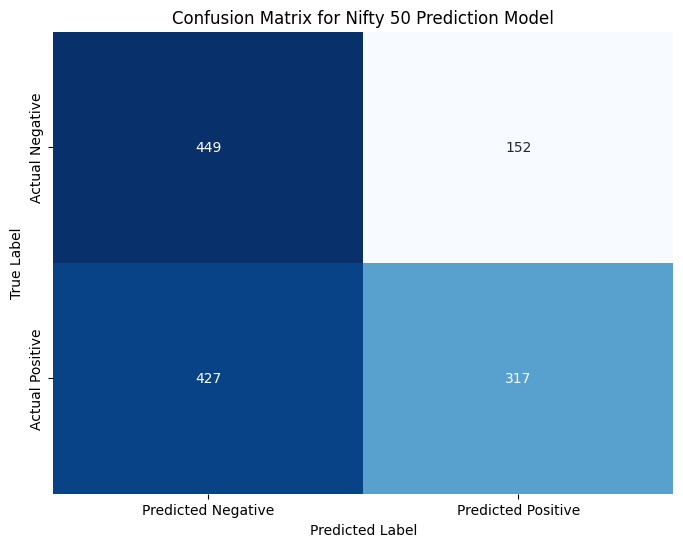

Precision for Positive Trend Predictions (1): 0.67590618336887


In [ ]:
conf_matrix = confusion_matrix(predictions["Target"], predictions["Predictions"])


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Nifty 50 Prediction Model")
plt.show()


true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]
precision_for_positive_trend = true_positives / (true_positives + false_positives)

print("Precision for Positive Trend Predictions (1):", precision_for_positive_trend)

In [ ]:

last_date = nifty.index[-1]
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, 6)]

future_data = pd.DataFrame(index=future_dates, columns=nifty.columns)
for column in ["Close", "Volume", "Open", "High", "Low"]:
    future_data[column] = nifty[column].iloc[-1]

for horizon in horizons:
    ratio_column = f"Close_Ratio_{horizon}"
    trend_column = f"Trend_{horizon}"
    momentum_column = f"Momentum_{horizon}"

    future_data[ratio_column] = nifty[ratio_column].iloc[-1]
    future_data[trend_column] = nifty[trend_column].iloc[-1]
    future_data[momentum_column] = nifty[momentum_column].iloc[-1]

nifty_extended = pd.concat([nifty, future_data.drop(columns=["Target"])])
nifty_extended_train = nifty_extended[nifty_extended["Target"].isin([0, 1])].dropna(subset=["Target"])
best_model.fit(nifty_extended_train[new_predictors], nifty_extended_train["Target"])
future_preds = best_model.predict(future_data[new_predictors])

future_data["Predictions"] = future_preds
print( future_data[["Predictions"]])


<ipython-input-30-47b13a3e829c>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  nifty_extended = pd.concat([nifty, future_data.drop(columns=["Target"])])


            Predictions
2024-11-13          0.0
2024-11-14          0.0
2024-11-15          0.0
2024-11-16          0.0
2024-11-17          0.0


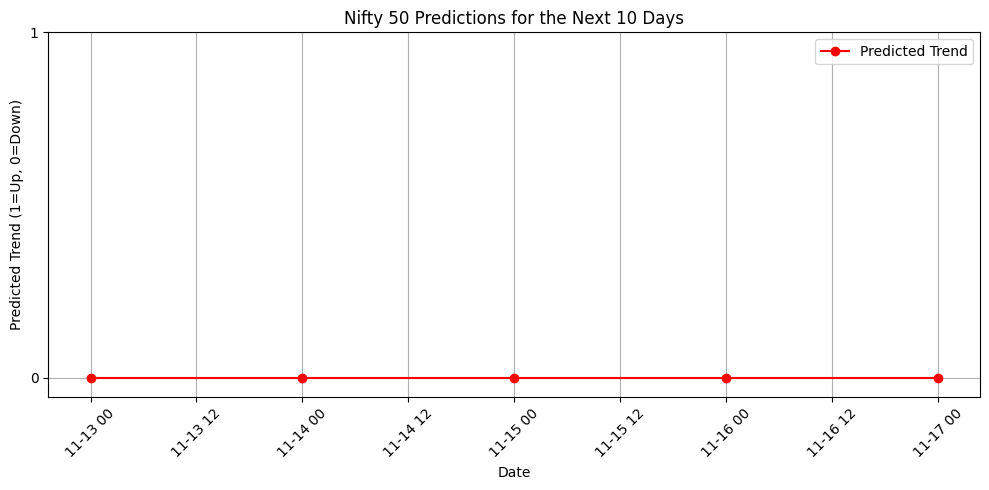

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(future_data.index, future_data["Predictions"], marker='o', linestyle='-', color='red', label="Predicted Trend")
plt.xlabel("Date")
plt.ylabel("Predicted Trend (1=Up, 0=Down)")
plt.title("Nifty 50 Predictions for the Next 10 Days")
plt.xticks(rotation=45)
plt.yticks([0, 1])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
predictions.to_csv("predictions.csv")

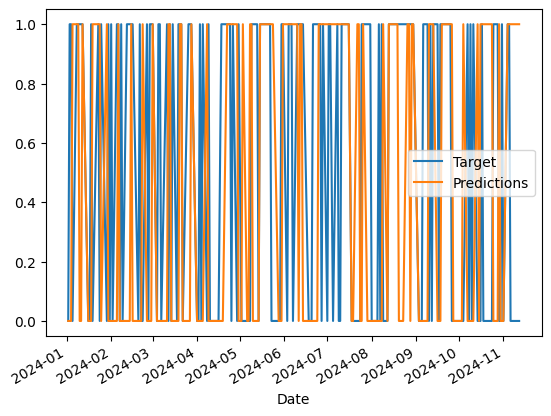

In [ ]:
predictions=predictions.loc["2024-01-01":]
predictions.plot();